<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.354536,33.933656,-15.811486,48.476706,63.051933,-14.575227
1,0.0,1.0,76.690340,69.595451,10.544921,166.830712,157.470706,9.360006
2,0.0,2.0,78.782179,64.829425,10.682391,164.293995,154.789134,9.504860
3,0.0,3.0,41.537183,85.965837,22.757882,160.260903,137.794121,22.466782
4,0.0,4.0,99.301067,69.804918,-4.758477,174.347508,181.037357,-6.689850
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.375531,74.834761,6.784083,161.994375,155.399025,6.595351
249996,999.0,246.0,66.578640,60.773918,9.855268,147.207826,137.465667,9.742159
249997,999.0,247.0,31.010516,37.202151,2.287152,80.499819,79.249020,1.250800
249998,999.0,248.0,39.363031,84.268777,22.667395,156.299203,135.077961,21.221242


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.354536,33.933656,-15.811486,48.476706,63.051933,-14.575227
1,0.0,1.0,76.690340,69.595451,10.544921,166.830712,157.470706,9.360006
2,0.0,2.0,78.782179,64.829425,10.682391,164.293995,154.789134,9.504860
3,0.0,3.0,41.537183,85.965837,22.757882,160.260903,137.794121,22.466782
4,0.0,4.0,99.301067,69.804918,-4.758477,174.347508,181.037357,-6.689850
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.375531,74.834761,6.784083,161.994375,155.399025,6.595351
249996,999.0,246.0,66.578640,60.773918,9.855268,147.207826,137.465667,9.742159
249997,999.0,247.0,31.010516,37.202151,2.287152,80.499819,79.249020,1.250800
249998,999.0,248.0,39.363031,84.268777,22.667395,156.299203,135.077961,21.221242


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    20.354536  33.933656 -15.811486   48.476706   63.051933   
      1.0    76.690340  69.595451  10.544921  166.830712  157.470706   
      2.0    78.782179  64.829425  10.682391  164.293995  154.789134   
      3.0    41.537183  85.965837  22.757882  160.260903  137.794121   
      4.0    99.301067  69.804918  -4.758477  174.347508  181.037357   
...                ...        ...        ...         ...         ...   
999.0 245.0  70.375531  74.834761   6.784083  161.994375  155.399025   
      246.0  66.578640  60.773918   9.855268  147.207826  137.465667   
      247.0  31.010516  37.202151   2.287152   80.499819   79.249020   
      248.0  39.363031  84.268777  22.667395  156.299203  135.077961   
      249.0  36.582626  53.797555  -0.370629  100.009552  101.466568   

                 e_hat  
rep   index             
0.0   0.0   -14.575227  
      1.0     9.360006  
      2.0     9.504860  
      3.0    22.466782  
      4.0    -6.689850  
...                ...  
999.0 245.0   6.595351  
      246.0   9.742159  
      247.0   1.250800  
      248.0  21.221242  
      249.0  -1.457016  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    20.354536  33.933656 -15.811486   48.476706   63.051933   
      1.0    76.690340  69.595451  10.544921  166.830712  157.470706   
      2.0    78.782179  64.829425  10.682391  164.293995  154.789134   
      3.0    41.537183  85.965837  22.757882  160.260903  137.794121   
      4.0    99.301067  69.804918  -4.758477  174.347508  181.037357   
...                ...        ...        ...         ...         ...   
999.0 245.0  70.375531  74.834761   6.784083  161.994375  155.399025   
      246.0  66.578640  60.773918   9.855268  147.207826  137.465667   
      247.0  31.010516  37.202151   2.287152   80.499819   79.249020   
      248.0  39.363031  84.268777  22.667395  156.299203  135.077961   
      249.0  36.582626  53.797555  -0.370629  100.009552  101.466568   

                 e_hat  
rep   index             
0.0   0.0   -14.575227  
      1.0     9.360006  
      2.0     9.504860  
      3.0    22.466782  
      4.0    -6.689850  
...                ...  
999.0 245.0   6.595351  
      246.0   9.742159  
      247.0   1.250800  
      248.0  21.221242  
      249.0  -1.457016  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,20.354536,33.933656,-15.811486,48.476706,63.051933,-14.575227
1,0.0,1.0,76.690340,69.595451,10.544921,166.830712,157.470706,9.360006
2,0.0,2.0,78.782179,64.829425,10.682391,164.293995,154.789134,9.504860
3,0.0,3.0,41.537183,85.965837,22.757882,160.260903,137.794121,22.466782
4,0.0,4.0,99.301067,69.804918,-4.758477,174.347508,181.037357,-6.689850
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.375531,74.834761,6.784083,161.994375,155.399025,6.595351
249996,999.0,246.0,66.578640,60.773918,9.855268,147.207826,137.465667,9.742159
249997,999.0,247.0,31.010516,37.202151,2.287152,80.499819,79.249020,1.250800
249998,999.0,248.0,39.363031,84.268777,22.667395,156.299203,135.077961,21.221242


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    20.354536  33.933656 -15.811486   48.476706   63.051933   
      1.0    76.690340  69.595451  10.544921  166.830712  157.470706   
      2.0    78.782179  64.829425  10.682391  164.293995  154.789134   
      3.0    41.537183  85.965837  22.757882  160.260903  137.794121   
      4.0    99.301067  69.804918  -4.758477  174.347508  181.037357   
...                ...        ...        ...         ...         ...   
999.0 245.0  70.375531  74.834761   6.784083  161.994375  155.399025   
      246.0  66.578640  60.773918   9.855268  147.207826  137.465667   
      247.0  31.010516  37.202151   2.287152   80.499819   79.249020   
      248.0  39.363031  84.268777  22.667395  156.299203  135.077961   
      249.0  36.582626  53.797555  -0.370629  100.009552  101.466568   

                 e_hat  
rep   index             
0.0   0.0   -14.575227  
      1.0     9.360006  
      2.0     9.504860  
      3.0    22.466782  
      4.0    -6.689850  
...                ...  
999.0 245.0   6.595351  
      246.0   9.742159  
      247.0   1.250800  
      248.0  21.221242  
      249.0  -1.457016  

[250000 rows x 6 columns]

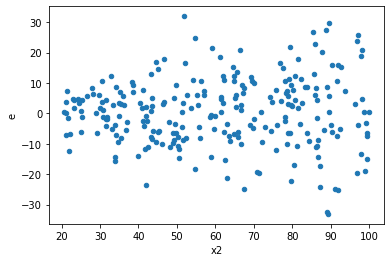

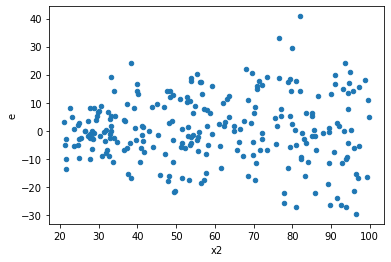

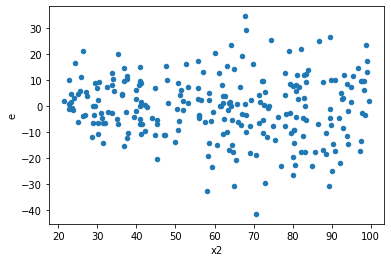

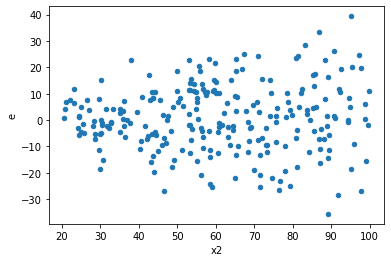

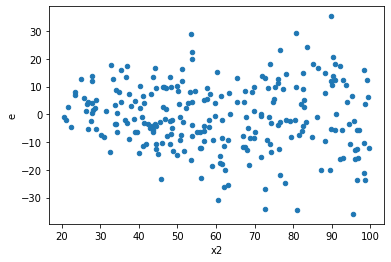

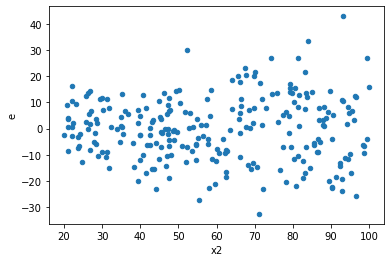

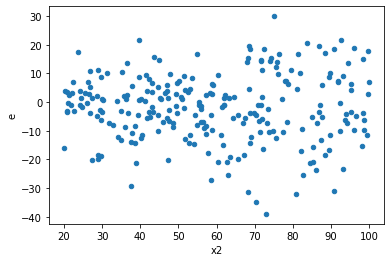

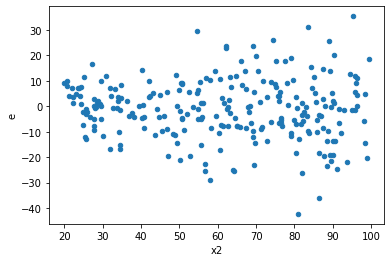

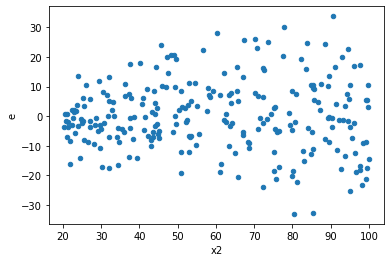

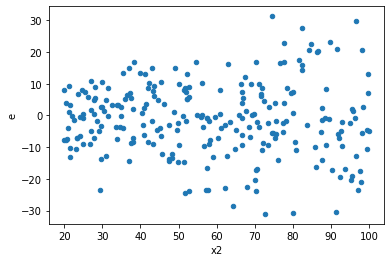

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,6944.320903628984,18866.13489561581,70.86041738396922,192.51158056750828,2.7167717560052114,1.3157830824894745e-06,0.9999993421084588,6.578915412447373e-07,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,7312.219091255477,18390.54706074477,74.61448052301508,187.65864347698746,2.5150432216586105,7.583298389013393e-06,0.9999962083508055,3.7916491945066966e-06,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,11091.680085734495,17717.614915324626,113.18040903810709,180.79198893188394,1.5973788261448365,0.02133715651759216,0.9893314217412039,0.01066857825879608,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,10558.89613524694,18756.450150330696,107.74383811476469,191.39234847276222,1.7763646796107104,0.004838122644782894,0.9975809386776086,0.002419061322391447,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,11099.149356953754,16135.490247418733,113.25662609136484,164.64785966753809,1.4537591781580674,0.06548808575714782,0.9672559571214261,0.03274404287857391,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,11015.056891680992,19161.37771572398,112.39853971103052,195.52426240534672,1.7395623013255077,0.0066026262258664925,0.9966986868870668,0.0033013131129332463,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,9001.998806054024,19747.01330038247,91.85713067402065,201.50013571818846,2.193625407626383,0.00012797801561803546,0.999936010992191,6.398900780901773e-05,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,8572.632478748252,18661.74424284358,87.47584161988011,190.42596166166916,2.176897736967782,0.0001483074365946635,0.9999258462817027,7.415371829733175e-05,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,7967.330045984097,19472.058519542923,81.29928618351119,198.6944746892135,2.4439879366310104,1.412675054801582e-05,0.999992936624726,7.06337527400791e-06,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,6944.320903628984,18866.13489561581,70.86041738396922,192.51158056750828,2.7167717560052114,1.3157830824894745e-06,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,7312.219091255477,18390.54706074477,74.61448052301508,187.65864347698746,2.5150432216586105,7.583298389013393e-06,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,11091.680085734495,17717.614915324626,113.18040903810709,180.79198893188394,1.5973788261448365,0.02133715651759216,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,10558.89613524694,18756.450150330696,107.74383811476469,191.39234847276222,1.7763646796107104,0.004838122644782894,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,11099.149356953754,16135.490247418733,113.25662609136484,164.64785966753809,1.4537591781580674,0.06548808575714782,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,11015.056891680992,19161.37771572398,112.39853971103052,195.52426240534672,1.7395623013255077,0.0066026262258664925,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,9001.998806054024,19747.01330038247,91.85713067402065,201.50013571818846,2.193625407626383,0.00012797801561803546,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,8572.632478748252,18661.74424284358,87.47584161988011,190.42596166166916,2.176897736967782,0.0001483074365946635,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,7967.330045984097,19472.058519542923,81.29928618351119,198.6944746892135,2.4439879366310104,1.412675054801582e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    712
Reject001=1 : Homoscedasticity      288
Name: Result_test, dtype: int64